In [1]:
import sys
sys.path.insert(0, '../')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import DataAnalysis as da

In [4]:
def angularMagnificationCalc(s, d_np, f_ob, f_ep):
    return s * d_np / (f_ob * f_ep)

def errorPropogartion(s, d_np, f_ob, f_ep, s_err, d_err, f_ob_err, f_ep_err):
    partial_s = d_np / (f_ob * f_ep)
    partial_d = s / (f_ob * f_ep)
    partial_fo =  f_ep * s * d_np / (f_ob * f_ep)**2
    partial_fe =  f_ob * s * d_np / (f_ob * f_ep)**2
    return da.quartrature_sum([partial_s*s_err,
                       partial_d*d_err,
                       partial_fo*f_ob_err,
                       partial_fe*f_ep_err])

def angularMagHeight(h, d_np):
    return h/d_np

def errorPropogartionHeight(h, d_np, h_err, d_np_err):
    partial_h = 1/d_np
    partial_d_np = h/d_np**2
    return da.quartrature_sum([partial_h*h_err, partial_d_np*d_np_err])

def errorPropogartionHeightAngle(theta, theta_mag, t_error, t_mag_err):
    partial_theta = theta_mag/theta**2
    partial_theta_mag = 1/theta
    return da.quartrature_sum([partial_theta*t_error, partial_theta_mag*t_mag_err])

In [24]:
d_np = 6.2

f_ob = 15.5
f_ep = 5
d_b  = [40, 40, 35, 44, 51, 63.4]
d_c  = [72, 71.3, 69, 74, 79.7, 90.4]
h    = [.74, .75, .9, .55, .5, .32]
theta     = [.6/distance for height, distance in zip(h, d_c)]
theta_mag = [height/distance for height, distance in zip(h, d_c)]
actual_ang_mag = [mag_t/t for t, mag_t in zip(theta, theta_mag)]
theta_error = [errorPropogartionHeight(.6, d, .02, 1) for d in d_c]
theta_mag_error = [errorPropogartionHeight(h1, d, .02, 1) for h1, d in zip(h, d_c)]
actual_ang_mag_error = [errorPropogartionHeightAngle(t, mag_t, t_err, t_mag_err)
                        for t, mag_t, t_err, t_mag_err in zip(theta, theta_mag, theta_error, theta_mag_error)]
s    = [c-b-20.5 for b,c in zip(d_b, d_c)]

In [25]:
angularMag = [angularMagnificationCalc(s_val, d_np, f_ob, f_ep) for s_val in s]
angularMagError = [errorPropogartion(s_val, d_np, f_ob, f_ep, 1, 2, .5,.5) for s_val in s]

In [26]:
print("The actual angular magnification are:")
for val, err in list(zip(actual_ang_mag, actual_ang_mag_error)):
    print(f"{'%.4s'%val} ± {'%.4s'%err}")

The actual angular magnification are:
1.23 ± 0.05
1.25 ± 0.05
1.5 ± 0.06
0.91 ± 0.04
0.83 ± 0.04
0.53 ± 0.03


In [29]:
print("The calculated angular magnification are:")
for val, err in list(zip(angularMag, angularMagError)):
    print(f"{'%.4s'%val} ± {'%.4s'%err}")

The calculated angular magnification are:
0.91 ± 0.32
0.86 ± 0.30
1.08 ± 0.37
0.76 ± 0.26
0.65 ± 0.23
0.52 ± 0.19


In [30]:
error = [(err1**2 + err2**2)**.5 for err1, err2 in zip(angularMagError, actual_ang_mag_error)]
for val1, val2, e in zip(actual_ang_mag, angularMag, error):
    if (np.abs(val1-val2)>2*e):
        print(f"Doesn't agree: {'%.4s'%(np.abs(val1-val2))} {'%.4s'%2*e}")
    else:
        print(f"Agrees:  {'%.4s'%(np.abs(val1-val2))} {'%.4s'%(2*e)}")

Agrees:  0.31 0.65
Agrees:  0.38 0.61
Agrees:  0.41 0.76
Agrees:  0.15 0.54
Agrees:  0.17 0.48
Agrees:  0.01 0.39


In [31]:
error

[0.32742595218805776,
 0.30948791304365286,
 0.3810611441566444,
 0.2742858849345864,
 0.24089945571435967,
 0.19753355163471148]

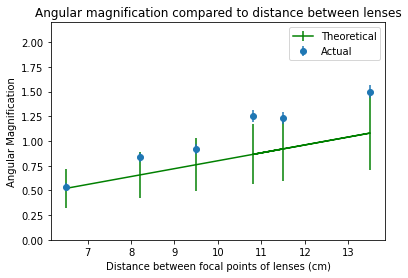

In [32]:
#plt.figure(facecolor='#40BFB8')
plt.title("Angular magnification compared to distance between lenses")
plt.errorbar(s, angularMag, yerr=angularMagError, c='g', label="Theoretical")
plt.errorbar(s, actual_ang_mag, fmt="o", yerr=actual_ang_mag_error, label="Actual")
plt.ylim(0,2.2)
plt.xlabel("Distance between focal points of lenses (cm)")
plt.ylabel("Angular Magnification")
plt.legend()
plt.savefig("angmagvss.png")
plt.show()

In [18]:
da.correlation_coefficients(s, actual_ang_mag)

0.986941106632838